In [2]:
import pandas as pd
data=pd.read_csv("ToyotaCorolla - MLR.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [3]:
#  1) Perform exploratory data analysis (EDA) to gain insights into the dataset.
#     Provide visualizations and summary statistics of the variables.
#     Pre-process the data to apply the MLR.

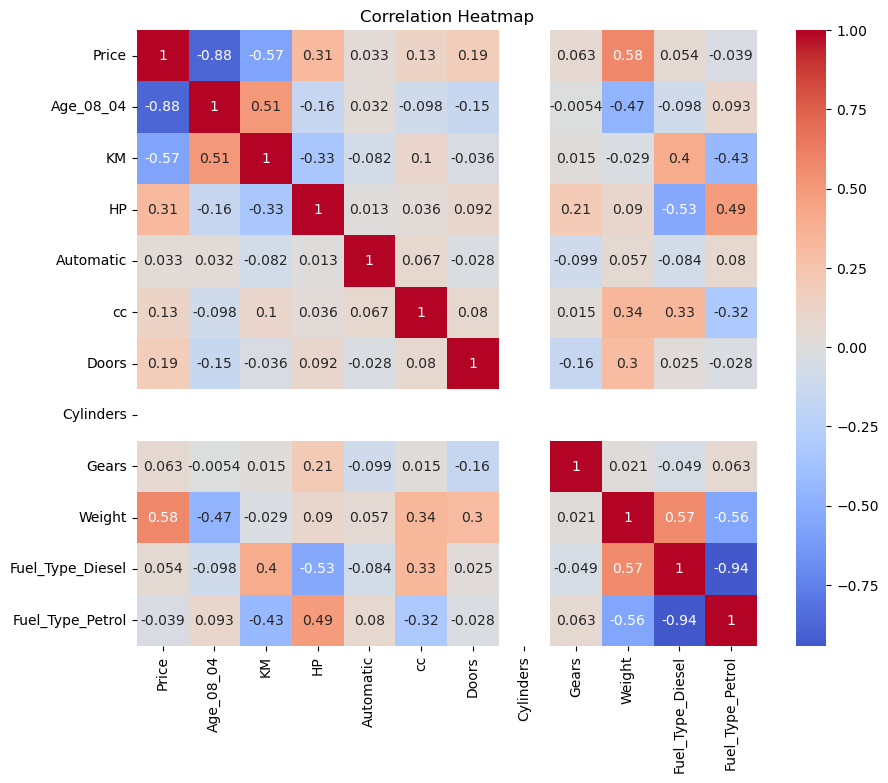

In [4]:
#EDA
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#  OneHotEncoding for categorical col Fuel_Type(Petrol/Diesel/CNG)
OH = OneHotEncoder(drop='first', sparse_output=False)
encoded = OH.fit_transform(data[['Fuel_Type']])
encoded_df = pd.DataFrame(encoded, columns=OH.get_feature_names_out(['Fuel_Type']))

# Combine encoded columns with original dataset
data = pd.concat([data.drop('Fuel_Type', axis=1), encoded_df], axis=1) 

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

==== VISUALIZATIONS ====


array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Fuel_Type_Diesel'}>,
        <Axes: title={'center': 'Fuel_Type_Petrol'}>]], dtype=object)

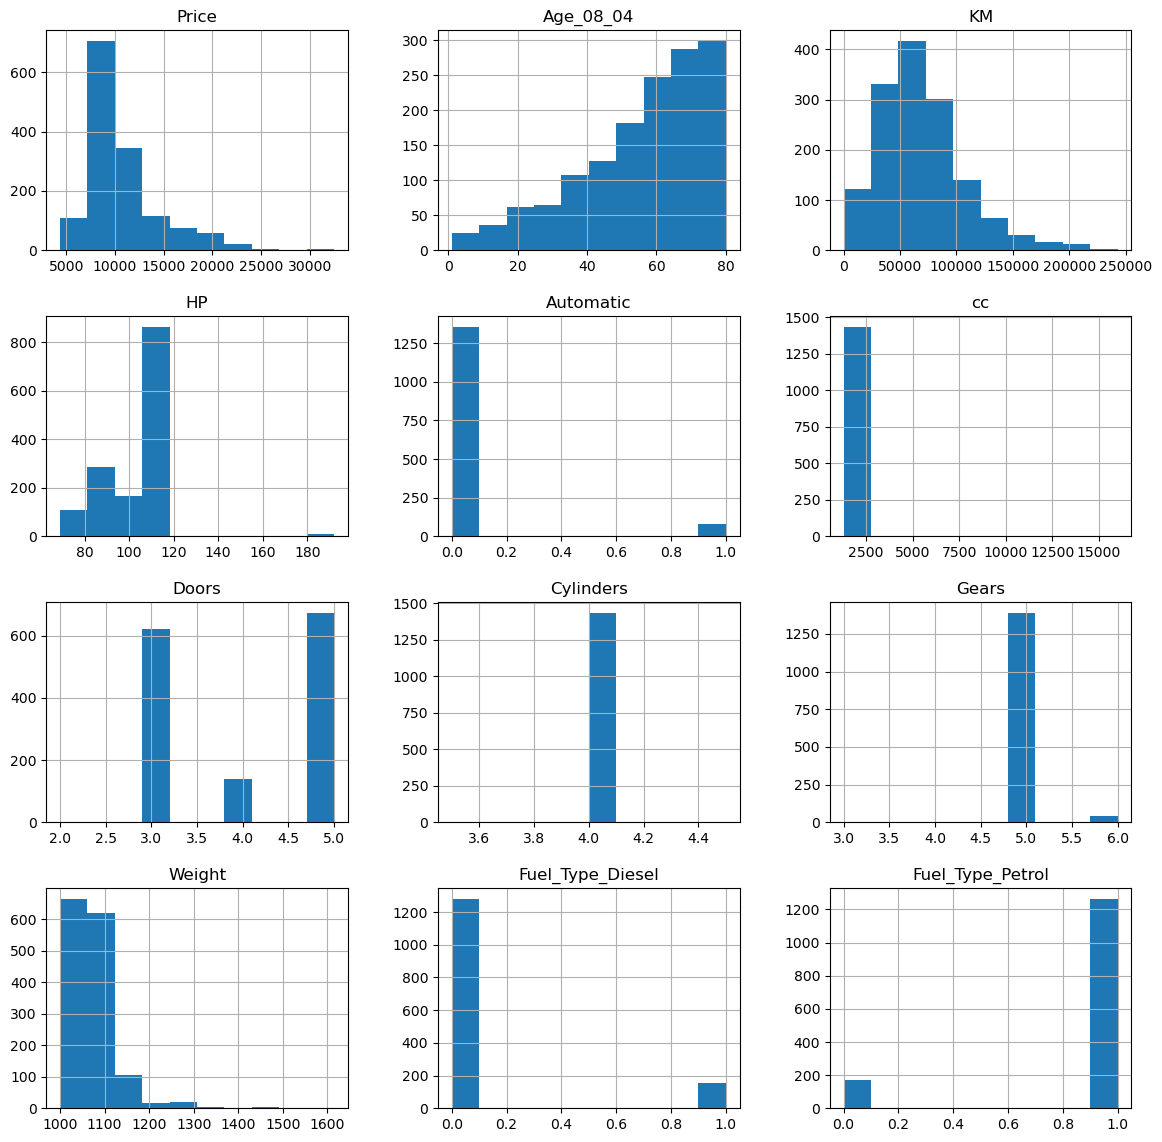

In [5]:
print("==== VISUALIZATIONS ====")
data.hist(figsize=(14,14))

In [6]:
print("==== Missing values in dataset ====")
data.isnull().sum()

==== Missing values in dataset ====


Price               0
Age_08_04           0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

In [7]:
print("==== Summary statistics of the variables ====")
data.describe()

==== Summary statistics of the variables ====


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000,1.000000,1.000000


In [37]:
# PREPROCESS  -  Standard Scalar

from sklearn.preprocessing import StandardScaler

X=data.drop(columns=['Price'])
Y=data['Price']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_scaled=pd.DataFrame(x_scaled,columns=X.columns)
x_scaled

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.771966,-0.574695,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
1,-1.771966,0.117454,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
2,-1.718184,-0.715386,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
3,-1.610620,-0.547650,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561,2.874807,-2.710874
4,-1.395491,-0.801028,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577,2.874807,-2.710874
...,...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883,-0.347849,0.368885
1432,0.863362,-1.321120,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.347849,0.368885
1433,0.809579,-1.374036,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.347849,0.368885
1434,0.755797,-1.376703,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915,-0.347849,0.368885


In [38]:
# 2)Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.20,random_state=100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 11)
(288, 11)
(1148,)
(288,)


In [45]:
#  3.Build a multiple linear regression model using the training dataset. 
#    Interpret the coefficients of the model. 
#    Build a minimum of 3 different models.

In [46]:
# Fit model
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

#training the model with training samples only
model1.fit(x_train,y_train)

LinearRegression()

In [47]:
#    Interpret the coefficients of the model.

print("Intercept (b0):", model1.intercept_)
print("\nCoefficients (b1...bn):")
coef_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': model1.coef_
})
print(coef_df)

Intercept (b0): 10771.332308702462

Coefficients (b1...bn):
             Feature   Coefficient
0          Age_08_04 -2.253578e+03
1                 KM -6.741255e+02
2                 HP  3.487632e+02
3          Automatic  6.818931e+01
4                 cc -2.319945e+01
5              Doors -3.089462e+01
6          Cylinders  3.410605e-13
7              Gears  1.182878e+02
8             Weight  1.198460e+03
9   Fuel_Type_Diesel  2.663502e+02
10  Fuel_Type_Petrol  5.457269e+02


In [48]:
x_reduced = x_scaled.drop(columns=['Cylinders'])
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x_reduced, Y, test_size=0.20, random_state=100
)

model2 = LinearRegression()
model2.fit(x_train2, y_train2)

LinearRegression()

In [49]:
selected_features = ['Age_08_04', 'KM', 'HP', 'Weight', 'Fuel_Type_Petrol']
x_selected = x_scaled[selected_features]

x_train3, x_test3, y_train3, y_test3 = train_test_split(
    x_selected, Y, test_size=0.20, random_state=100
)

model3 = LinearRegression()
model3.fit(x_train3, y_train3)

LinearRegression()

In [36]:
# 4.Evaluate the performance using appropriate evaluation metrics on the testing dataset.

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
for i, (m, Xt, yt) in enumerate([(model1, x_test, y_test), 
                                 (model2, x_test2, y_test2), 
                                 (model3, x_test3, y_test3)], 1):
    y_pred = m.predict(Xt)
    print(f"\nModel {i} Results:")
    print("R² Score:", r2_score(yt, y_pred))
    print("MSE:", mean_squared_error(yt, y_pred))


Model 1 Results:
R² Score: 0.8447999826360229
MSE: 1847365.583518657

Model 2 Results:
R² Score: 0.844799982636023
MSE: 1847365.5835186564

Model 3 Results:
R² Score: 0.8447102636838367
MSE: 1848433.5196392394


In [52]:
# 5.Apply Lasso and Ridge methods on the model.

In [53]:
#  Multiicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = data.drop('Price', axis=1)
X = sm.add_constant(X)

vif = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)

print(vif)

Age_08_04              1.920520
KM                     2.001790
HP                     2.299766
Automatic              1.094550
cc                     1.223892
Doors                  1.217898
Cylinders           1877.037630
Gears                  1.117413
Weight                 3.297145
Fuel_Type_Diesel      11.317251
Fuel_Type_Petrol       9.702194
dtype: float64


In [57]:
# RIDGE AND LASSO

from sklearn.linear_model import Lasso,Ridge

lasso=Lasso(alpha=0.5)
lasso.fit(x_train2,y_train2)
y_pred_lasso=lasso.predict(x_test2)

ridge=Ridge(alpha=0.5)
ridge.fit(x_train2,y_train2)
y_pred_ridge=ridge.predict(x_test2)

print("Lasso R²:", r2_score(y_test, y_pred_lasso))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))

Lasso R²: 0.84495677921593
Ridge R²: 0.8448590682091129
Lasso MSE: 1845499.2138477406
Ridge MSE: 1846662.2804130067


In [1]:
#                                                                   INTERVIEW QUESTIONS

In [ ]:
'''Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
2.What techniques can be used to address multicollinearity in multiple linear regression?


Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications.

In [ ]:
# Normalization & Standardization:
   ' MinMaxScaler() scales to [0,1].
   ' StandardScaler() scales to mean=0 and std=1.

# VIF Calculation:
    'VIF > 10 indicates high multicollinearity.
   ' Helps identify problematic features.

# Handling Multicollinearity:
   ' Dropping correlated variables or using Ridge Regression stabilizes coefficients.

# Assumptions & Implications
 
   ' Assumption: Linear relationship between independent and dependent variables.
  '  Multicollinearity can inflate standard errors and make p-values unreliable.
   ' Dropping features or using regularization may reduce overfitting but can slightly reduce interpretability.